# Autofocus 
This is a notebook to provide a boilerplate for an autofocus routine triggered by the imswitch client.


In [ ]:
import imswitchclient.ImSwitchClient as imc
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

# Connect to ImSwitch
if 0:
    hostname = "imswitch.openuc2.com"  # Change to the hostname of the computer running ImSwitch
    port = 443
else:
    hostname = "localhost"
    port = 8001
isHttps = True
client = imc.ImSwitchClient(host=hostname, port=port, isHttps=isHttps)


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [8]:

# Define grid parameters
nx, ny = 3, 3   # 5x5 grid
spacing_mm = 10 # spacing of 10 mm between each grid point
spacing_um = spacing_mm * 1000.0  # convert mm to microns if needed

# Retrieve current stage position
positioner_name = client.positionersManager.allStageNames[0]
current_positions = client.positionersManager.getPositionerPositions()[positioner_name]
x0, y0, z0 = current_positions["X"], current_positions["Y"], current_positions["Z"]

# Define the z-sweep parameters
z_start = -10
z_end = 10
z_step = 3
z_positions = np.arange(z_start, z_end + z_step, z_step) + z0
t_wait = 0.2  # time to wait after moving the stage

# A simple focus metric using Laplacian variance
def focus_metric(img):
    return cv2.Laplacian(img, cv2.CV_64F).var()

# Prepare to store the best focus scores in a 2D array
focus_map = np.zeros((ny, nx, 2), dtype=np.float32)

# Iterate over grid positions
for j in range(ny):
    for i in range(nx):
        # Compute the absolute target position
        target_x = x0 + i * spacing_um
        target_y = y0 + j * spacing_um

        # Move to the XY tile
        client.positionersManager.movePositioner(None, "X", target_x, is_absolute=True, is_blocking=True)
        client.positionersManager.movePositioner(None, "Y", target_y, is_absolute=True, is_blocking=True)
        time.sleep(t_wait)

        # Sweep through Z and find the best focus score
        best_score = 0.0
        best_zpos = z_positions[0]
        for z in z_positions:
            client.positionersManager.movePositioner(None, "Z", z, is_absolute=True, is_blocking=True)
            time.sleep(t_wait)

            img = client.recordingManager.snapNumpyToFastAPI()
            score = focus_metric(img)
            if score > best_score:
                best_score = score
                best_zpos = z
                
            

        focus_map[j, i] = (best_score, best_zpos)
        # move back to initial Z position    
        client.positionersManager.movePositioner(None, "Z", z0, is_absolute=True, is_blocking=True)

        print(f"Grid ({j}, {i}): Best focus score = {best_score}")



/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (0, 0): Best focus score = 1645.1659786388889


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (0, 1): Best focus score = 356.35642131972224


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (0, 2): Best focus score = 492.7960936933334


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (1, 0): Best focus score = 2696.890630308264


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (1, 1): Best focus score = 1101.9767942197223


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (1, 2): Best focus score = 984.5571822899306


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (2, 0): Best focus score = 1343.2958715455557


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (2, 1): Best focus score = 54.58458328638889


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Grid (2, 2): Best focus score = 54.28483631


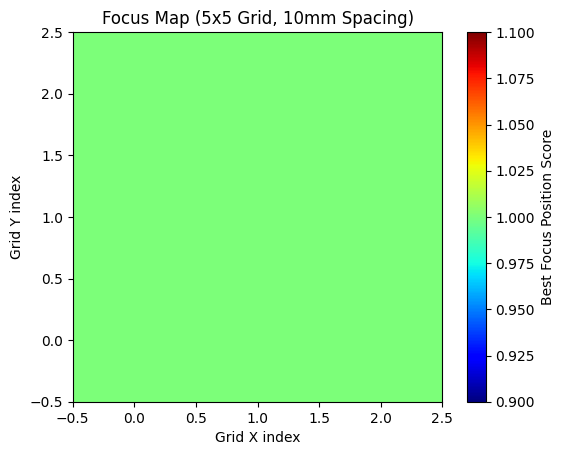

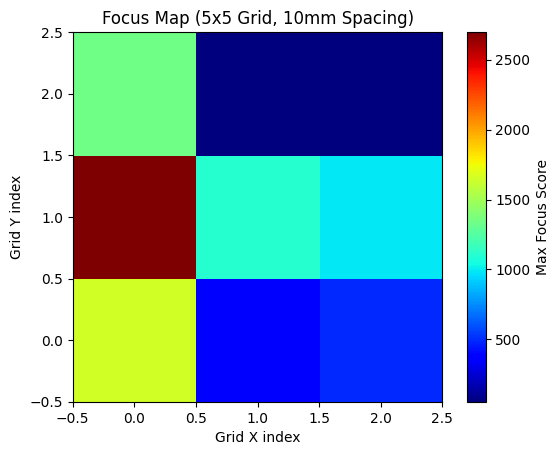

In [11]:
# Plot the focus map as a heatmap
plt.figure()
plt.imshow(focus_map[:,:,1], cmap='jet', origin='lower')
plt.colorbar(label='Best Focus Position Score')
plt.title('Focus Map (5x5 Grid, 10mm Spacing)')
plt.xlabel('Grid X index')
plt.ylabel('Grid Y index')
plt.show()

# Plot the focus map as a heatmap
plt.figure()
plt.imshow(focus_map[:,:,0], cmap='jet', origin='lower')
plt.colorbar(label='Max Focus Score')
plt.title('Focus Map (5x5 Grid, 10mm Spacing)')
plt.xlabel('Grid X index')
plt.ylabel('Grid Y index')
plt.show()
